In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Create inspector and connect to engine
inspector = inspect(engine)

In [8]:
# Retrieve the table names in the database using the inspector 
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Inspect the measurement data set
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Inspect the station data set
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect = True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [17]:
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
one_year_ago

datetime.date(2016, 8, 23)

In [18]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23', measurement.date <='2017-08-23').\
    order_by(measurement.date).all()

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(query, columns=['Date', 'Precipitation'])
measurement_df.set_index('Date', inplace = True)
measurement_df.head(14)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


In [20]:
# Sort the dataframe by date
measurement_df.sort_values('Date')
measurement_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


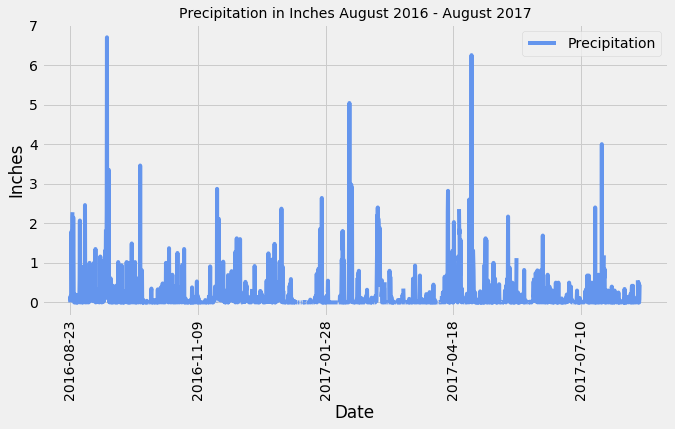

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(kind = 'line', rot = 90, figsize = (10,5), color = 'cornflowerblue')
plt.ylabel('Inches')
plt.title('Precipitation in Inches August 2016 - August 2017', size = 14)
plt.legend
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(station.station)).all()
total_stations

[(9,)]

In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_temps = session.query(func.min(measurement.tobs), 
                                  func.max(measurement.tobs), 
                                  func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
most_active_temps

[(54.0, 85.0, 71.66378066378067)]

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Query the last 12 months of temperature observation data for the most active station
temp_query = session.query(measurement.date, measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= '2016-08-23', measurement.date <='2017-08-23').\
    order_by(measurement.date).all()

In [61]:
# Save the query results as a Pandas DataFrame
station_temp_df = pd.DataFrame(temp_query, columns = ['Date', 'Station', 'tobs'])
station_temp_df

,Date,Station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0
...,...,...,...
347,2017-08-14,USC00519281,77.0
348,2017-08-15,USC00519281,77.0
349,2017-08-16,USC00519281,76.0
350,2017-08-17,USC00519281,76.0


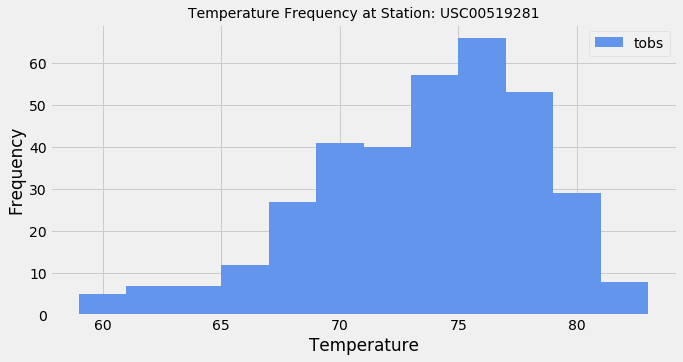

In [63]:
# Plot the last 12 months of temperature observation data as a histrogram with bins = 12
station_temp_df.plot(kind = 'hist', bins = 12, figsize = (10,5), color = 'cornflowerblue')
plt.xlabel('Temperature')
plt.title('Temperature Frequency at Station: USC00519281', size =14)
plt.legend(loc = 'best')
plt.show()

# Close session

In [64]:
# Close Session
session.close()